<div align='center'><h1 style='color:#448EE4;font-size: 45px'}>Sales Prediction</h1></div>


<div class='alert alert-info'><h3><b><i>This Project will guide you through the exciting world of sales prediction using machine learning in Python. We'll delve into the world of data science and explore how it empowers businesses to optimize advertising strategies. By leveraging the power of Python libraries, we'll build a sales prediction model that considers various factors influencing customer purchases. This model will be instrumental in making informed decisions about advertising costs and maximizing your sales potential. So, buckle up and get ready to embark on this data-driven adventure!     

<div class='alert alert-info'><h3><b><i>I have used two models i.e. Linear Regression and SVM. Explore the notebook to find the results.

![](https://miro.medium.com/v2/resize:fit:875/1*0uM6XZw2eC4E8yrUMmtMBQ.jpeg)

## For Kaggle Dataset : [Click here](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

## Importing Libraries
#### We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset into a DataFrame

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

### Performing Exploratory Data Analysis

In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Performing Data Visualization

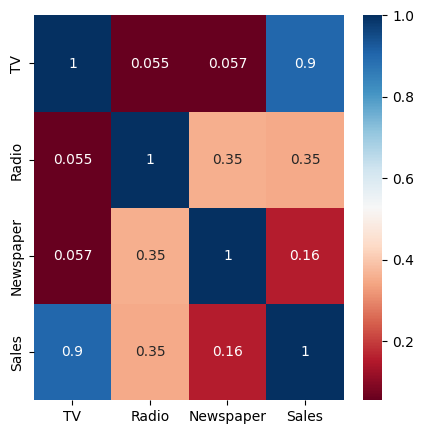

In [7]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.show()

> ### There is a positive correlation of Sales with TV expenditure, Newspaper expenditure and Radio expenditure

> ### But the value for Newspaper Expenditure is less. We will explore it in the following cells

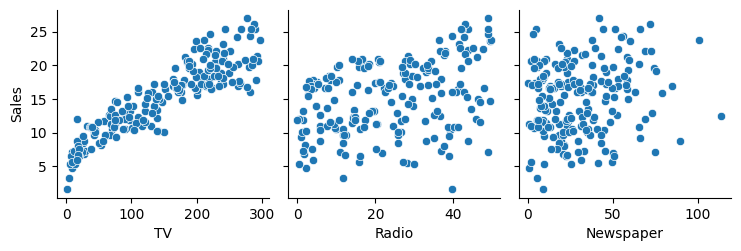

In [8]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

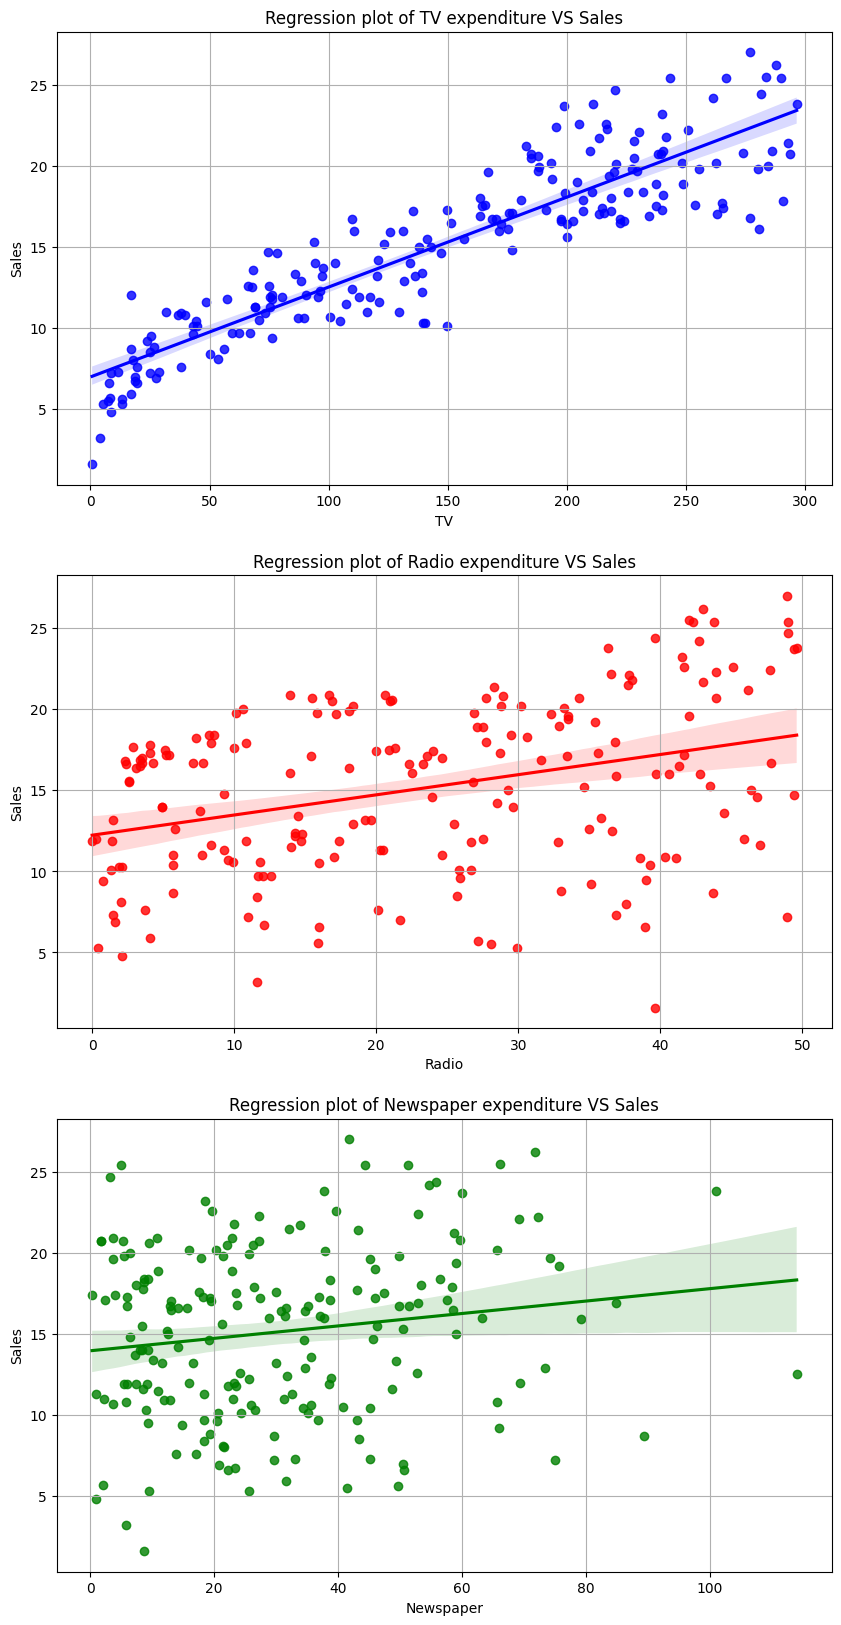

In [9]:
fig=plt.figure(figsize=(10,20))
ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)
sns.regplot(x='TV',y='Sales',data=df,ax=ax1,color='blue')
ax1.set_title("Regression plot of TV expenditure VS Sales")
ax1.grid(True)
sns.regplot(x='Radio',y='Sales',data=df,ax=ax2,color='red')
ax2.set_title("Regression plot of Radio expenditure VS Sales")
ax2.grid(True)
sns.regplot(x='Newspaper',y='Sales',data=df,ax=ax3,color='green')
ax3.set_title("Regression plot of Newspaper expenditure VS Sales")
ax3.grid(True)



#### Let's create a dataframe of total of each expenditure type

In [10]:
df_expenditure=pd.DataFrame({'Type':["TV","Radio","Newspaper"],'Total':[df['TV'].sum(),df['Radio'].sum(),df['Newspaper'].sum()]})
df_expenditure.head()

,Type,Total
0,TV,29408.5
1,Radio,4652.8
2,Newspaper,6110.8


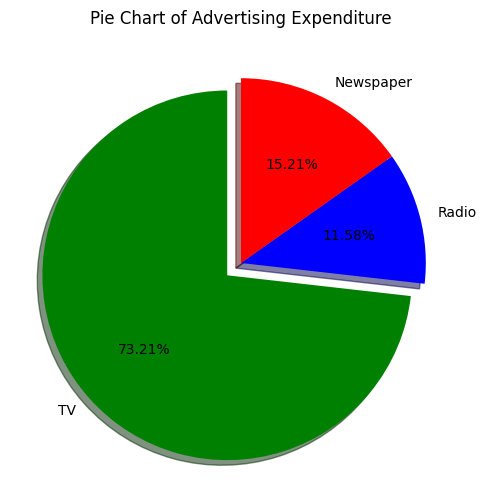

In [11]:
plt.figure(figsize=(8, 6))
df_expenditure['Total'].plot(kind='pie',labels=df_expenditure['Type'],autopct='%1.2f%%',startangle=90,shadow=True,explode=[0.1,0,0],colors=['green','Blue','Red'])
plt.title("Pie Chart of Advertising Expenditure")
plt.ylabel('')
plt.show()

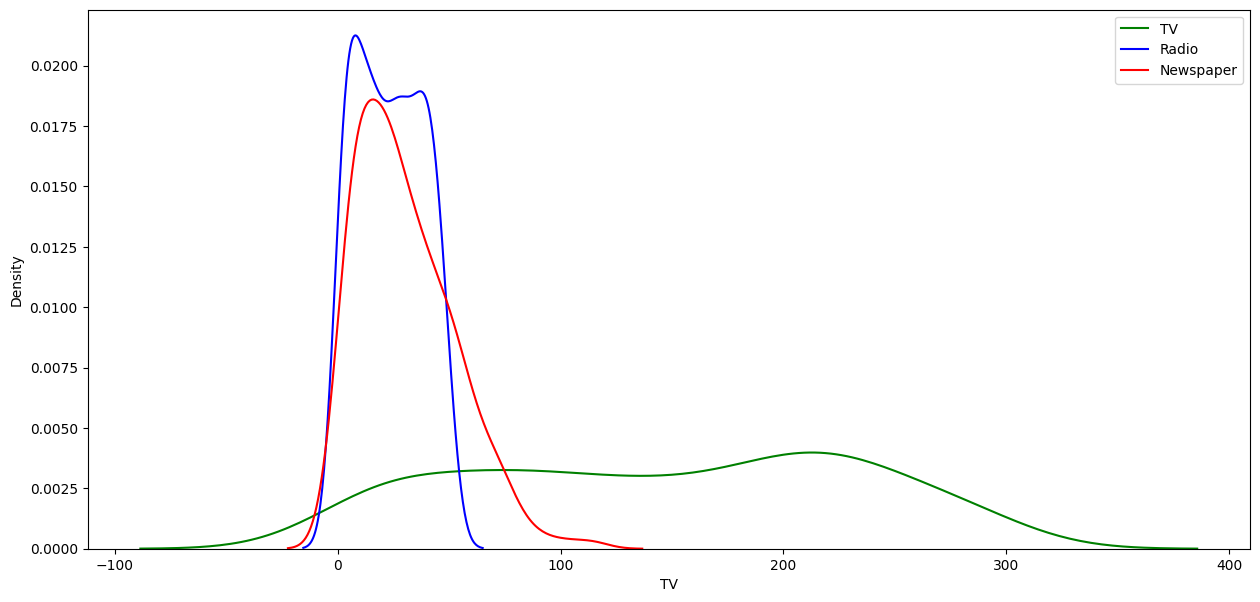

In [12]:
plt.figure(figsize=(15,7))
ax=sns.kdeplot(x=df["TV"],color='green')
ax1=sns.kdeplot(x=df["Radio"],ax=ax,color='blue')
sns.kdeplot(x=df["Newspaper"],ax=ax1,color='red')
plt.legend(['TV','Radio','Newspaper'])
plt.show()

> #### A reason for less correlation of Sales with radio and newspaper's expenditure can that there has not been a long term investment for their expenditure.

> #### As in the case of TV's expenditure, there has been a long term investment and therefore it has very strong correlation with Sales
> #### We can see it from the part of dataframe below

In [13]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


### Predictive Modelling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df[['TV','Radio']]
Y=df['Sales']

#### Splitting the dataset into training and testing

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [17]:
print("\n",X_train.shape,"\n",X_test.shape,"\n",Y_train.shape,"\n",Y_test.shape,"\n")


 (160, 2) 
 (40, 2) 
 (160,) 
 (40,) 



In [18]:
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
StandardScaler.fit(X_train)
X_train=StandardScaler.transform(X_train)
X_test=StandardScaler.transform(X_test)

### Using Linear Regression for Prediction

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
yhat=lr.predict(X_test)

### Model Evaluation

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2=r2_score(yhat,Y_test)
print(f"The R squared value for the model is {r2:.4f} which shows that the model is performing decently")

The R squared value for the model is 0.9036 which shows that the model is performing decently


#### Comparing the Predicted and Actual Values by using a KDE plot

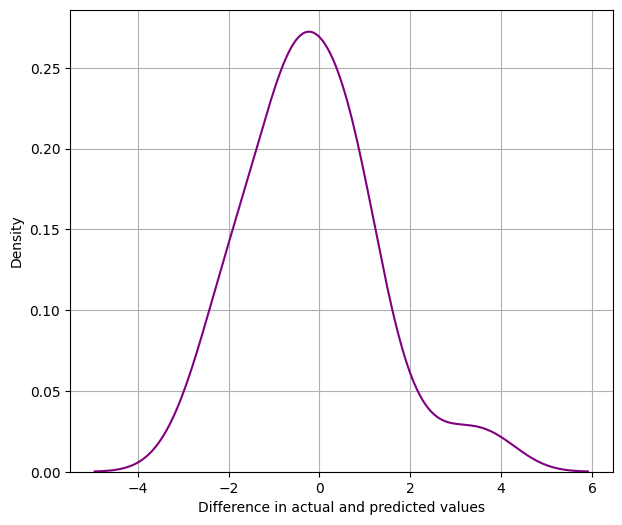

In [23]:
plt.figure(figsize=(7,6))
sns.kdeplot(yhat-Y_test,color='purple')
plt.xlabel("Difference in actual and predicted values")
plt.grid(True)
plt.show()

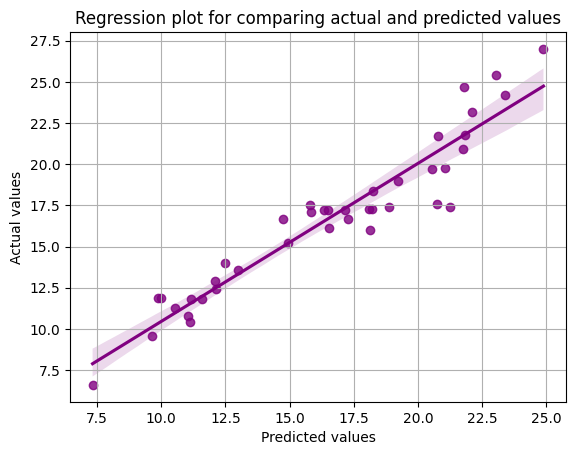

In [24]:
sns.regplot(x=yhat,y=Y_test,color='purple')
plt.title("Regression plot for comparing actual and predicted values")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.grid(True)
plt.show()

Let's fit an SVM

### Using Support Vector Machine for Prediction

In [25]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [26]:
svc_model=SVR()
param_grid={'C':[0.01,0.1,1,10],'kernel':['linear','rbf'],'gamma':[0.01,0.1,1,10]}
grid=GridSearchCV(svc_model,param_grid=param_grid,cv=10)
grid.fit(X_train,Y_train)
print("Best parameters",grid.best_params_)
print("Best cross validation score",grid.best_score_)

Best parameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross validation score 0.9282178540598072


In [27]:
best_model=grid.best_estimator_
yhat2=best_model.predict(X_test)

### Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yhat2,Y_test))
R2=r2_score(yhat2,Y_test)
print(f"The R squared value for the model is {R2:.4f} which shows that the model is performing decently")

1.17751825194247
The R squared value for the model is 0.9464 which shows that the model is performing decently


#### Comparing the Predicted and Actual Values by using a Scatter plot

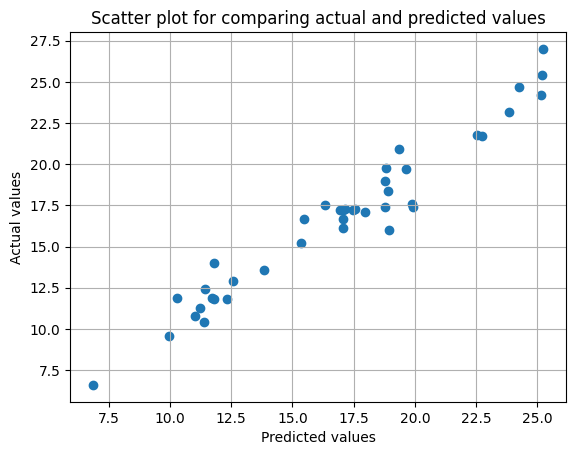

In [29]:
plt.scatter(x=yhat2,y=Y_test)
plt.title("Scatter plot for comparing actual and predicted values")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.grid(True)

#### Comparing the Predicted and Actual Values by using a KDE plot

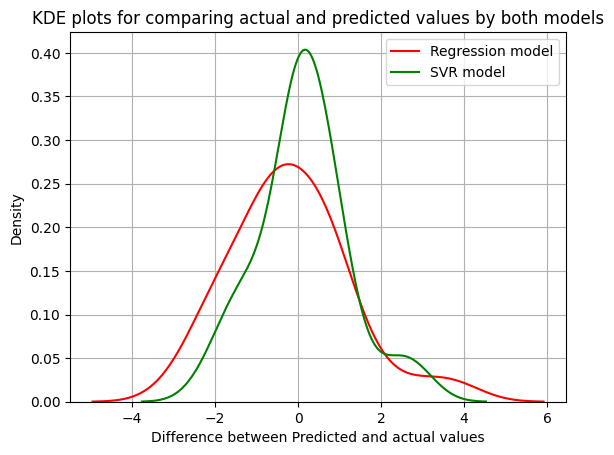

In [30]:
ax=sns.kdeplot(yhat-Y_test,color='red')
sns.kdeplot(yhat2-Y_test,color='green')
plt.legend(['Regression model','SVR model'])
plt.title("KDE plots for comparing actual and predicted values by both models")
plt.xlabel('Difference between Predicted and actual values')
plt.grid(True)
plt.show()

> ### The above plots show that the model is performing extremely well with SVM model performing better.

### Let's make a DataFrame for Predicted and Actual Values

In [31]:
df_predictions=pd.DataFrame({'Actual Values':Y_test,'Predicted by Regression':yhat,'Predicted by SVM model':yhat2})

In [32]:
df_predictions

,Actual Values,Predicted by Regression,Predicted by SVM model
11,17.4,18.886106,18.799474
99,17.2,16.358733,16.930212
128,24.7,21.792930,24.252334
175,27.0,24.892035,25.252737
1,10.4,11.126320,11.372733
111,21.8,21.824973,22.534169
90,14.0,12.483310,11.803483
177,16.7,14.757095,15.487754
88,12.9,12.097870,12.557764
187,17.3,18.078209,17.548945


> #### The above dataframe shows how close the predicted values are to the actual values

# Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)